# Simulation testing
Testing embedding and fractal dimension code with colored noise and Lorentz attractor.

In [43]:
%load_ext autoreload
%autoreload 2
    
%matplotlib inline
import time
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

sys.path.append('/Users/rdgao/Documents/code/research/SpaceRecon/')
sys.path.append('/Users/rdgao/Documents/code/research/spectralCV/')
sys.path.append('/Users/rdgao/Documents/code/research/neurodsp/')
sys.path.append('/Users/rdgao/Documents/code/research/fooof/')

from fooof import FOOOF
from fooof import FOOOFGroup
import neurodsp as ndsp
import neurodsp.spectral as spectral
from nlds import delayembed as de
from nlds import dfa, utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def lorenz(X, t, sigma, beta, rho):
    """The Lorenz equations."""
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

def sim_lorenz(T, fs, init, args):
    t = np.arange(0,T,1/fs)
    f = odeint(lorenz, init, t, args)
    x, y, z = f.T
    return x,y,z

In [104]:
def compute_features(data, fs, fit_range=[10,100]):
    f_axis,psd = spectral.psd(x,fs)
    plt.subplot(1,2,1)
    plt.loglog(f_axis,psd)
    
    feat = np.zeros(5)
    # linear fit
    feat[0] = -spectral.fit_slope(f_axis,psd,fit_range)[0]
    
    # fooof full linear fit
    fn = FOOOF(verbose=False)
    fn.fit(f_axis, psd, fit_range)
    feat[1] = fn.get_results().background_params[-1]
    
    # fooof full knee fit
    fn = FOOOF(background_mode='knee',verbose=False)
    fn.fit(f_axis, psd, fit_range)
    feat[2] = fn.get_results().background_params[1]
    feat[3] = fn.get_results().background_params[2]
    
    #dfa
    t_scales, df, alpha = dfa.dfa(x,fs,n_scales=20, min_scale=0.05, max_scale=5, deg=1, method='dfa')
    feat[4] = alpha
    
    print('PSD slope: %f'%feat[0])
    print('FOOOFed PSD slope: %f'%feat[1])
    print('kneeFOOOFed PSD slope: %f'%feat[3])
    print('DFA exponent & DFA estimated 1/f: %f, %f' %(alpha, 2*alpha-1))

    plt.subplot(1,2,2)
    plt.loglog(t_scales, df, '.', label='DFA');
    plt.legend()
    return feat

### DFA tests
# Generate pure power-law colored noise and compute Hurst exponent & slope.

True slope: 1.500000
PSD slope: 1.506914
FOOOFed PSD slope: 1.508403
kneeFOOOFed PSD slope: 1.486080
DFA exponent & DFA estimated 1/f: 1.247537, 1.495073


array([ 1.50691422,  1.50840288, -1.90905796,  1.48608012,  1.24753653])

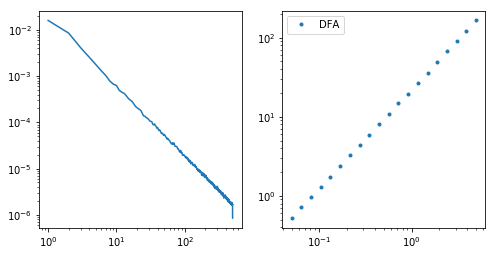

In [106]:
exp = -1.5
fs = 1000
T = 600
# generate colored noise with expected power law exponent
x = utils.sim_powerlaw_signal(T,fs,exponent=exp)
f_axis,psd = spectral.psd(x,1000)
print('True slope: %f'%-exp)
plt.figure(figsize=(8,4))
compute_features(x,fs)

# Generate time series from Lorenz attractor

PSD slope: 6.778842
FOOOFed PSD slope: 6.778842
kneeFOOOFed PSD slope: 6.868342
DFA exponent & DFA estimated 1/f: 1.461999, 1.923999


array([6.77884194, 6.77884194, 6.60693547, 6.86834249, 1.46199941])

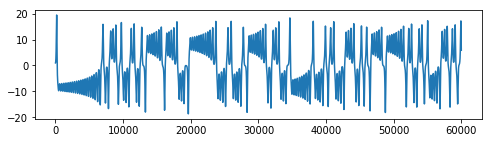

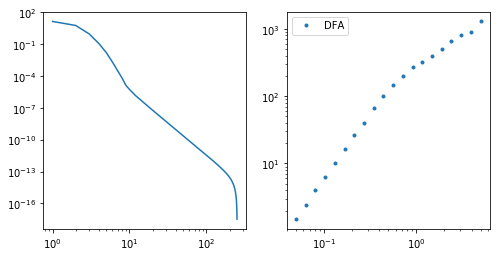

In [107]:
# Lorenz paramters and initial conditions
T,fs = 120,500
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 1, 1, 1.05
x,y,z = sim_lorenz(T,fs,init=(u0, v0, w0), args=(sigma, beta, rho))
sig = x
plt.figure(figsize=(8,2))
plt.plot(sig)
plt.figure(figsize=(8,4))
compute_features(sig,fs,[1,100])

# Lorentzian colored noise

PSD slope: 0.387492
FOOOFed PSD slope: 0.360718
kneeFOOOFed PSD slope: 2.115367
DFA exponent & DFA estimated 1/f: 0.536964, 0.073927


/Users/rdgao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


PSD slope: 0.795787
FOOOFed PSD slope: 0.694626
kneeFOOOFed PSD slope: 2.165680
DFA exponent & DFA estimated 1/f: 0.588654, 0.177308


/Users/rdgao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


PSD slope: 1.246591
FOOOFed PSD slope: 1.074345
kneeFOOOFed PSD slope: 1.874828
DFA exponent & DFA estimated 1/f: 0.636739, 0.273477


/Users/rdgao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


PSD slope: 1.579535
FOOOFed PSD slope: 1.417260
kneeFOOOFed PSD slope: 1.896806
DFA exponent & DFA estimated 1/f: 0.703878, 0.407755


/Users/rdgao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


PSD slope: 1.876889
FOOOFed PSD slope: 1.779973
kneeFOOOFed PSD slope: 1.936633
DFA exponent & DFA estimated 1/f: 0.904551, 0.809102


/Users/rdgao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


PSD slope: 2.015231
FOOOFed PSD slope: 1.993612
kneeFOOOFed PSD slope: 2.036748
DFA exponent & DFA estimated 1/f: 1.021337, 1.042673


/Users/rdgao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'PSD (vary decay time)')

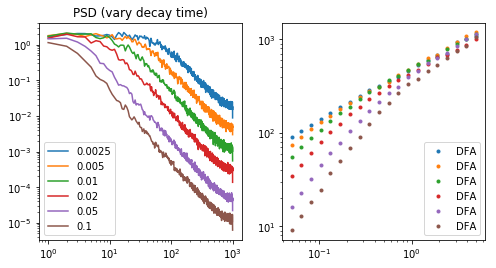

In [118]:
T = 60
fs = 2000
taus = [0.0025, 0.005, 0.01, 0.02, 0.05, 0.1]
feat = np.zeros((5,len(taus)))
fit_freqs = [2,100]
plt.figure(figsize=(8,4))
for i, tau in enumerate(taus):
    x = ndsp.sim_synaptic_noise(T,fs,tauD=tau)
    feat[:,i] = compute_features(x,fs,fit_freqs)

plt.subplot(1,2,1)
plt.legend(taus)
plt.title('PSD (vary decay time)')
    

Text(0,0.5,'Knee Fit Knee')

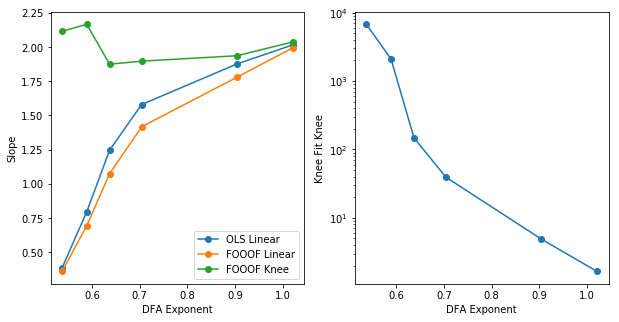

In [119]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
for i in [0,1,3]:
    plt.plot(feat[-1,:], feat[i,:], '-o')
plt.legend(('OLS Linear', 'FOOOF Linear', 'FOOOF Knee'))
plt.xlabel('DFA Exponent')
plt.ylabel('Slope')
plt.subplot(1,2,2)
plt.plot(feat[-1,:], feat[2,:], '-o')
plt.yscale('log')
plt.xlabel('DFA Exponent')
plt.ylabel('Knee Fit Knee')

### Testing my code runtime speed

(157, 0.8851322990337012)


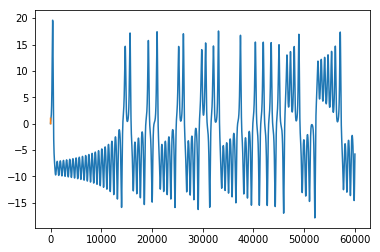

In [65]:
# Lorenz paramters and initial conditions
T,fs = 60,1000
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1.05
x,y,z = sim_lorenz(T,fs,init=(u0, v0, w0), args=(sigma, beta, rho))
plt.plot(x)

tMI, dMI = de.compute_delay_MI(x,50,1000)
opt_delay = de.find_valley(dMI)
print(opt_delay)
#plt.plot(dMI)

# del_R, rel_R = de.compute_nn_dist(x,opt_delay[0],5)
# recon_dim, pfnn = de.compute_attractor_dim(del_R,rel_R)
recon_dim, pfnn = de.pfnn_de_dim(x,opt_delay[0])
plt.plot(pfnn)
#print(recon_dim, pfnn)